## Credit Card Fraud Detection Dataset 

The Credit Card Fraud Detection from Kaggle has been used in order to apply the theory of Deep learning using Big Data.

Data set is 279MB which is considered to be Big Data.

A Random Forest model and ANN algorith is going to be prepared to check their performance when usisng big data.

In [1]:
#pip install tensorflow 

In [2]:
#pip install keras

In [3]:
#Import the libraries
import matplotlib
matplotlib.use("TkAgg")
import pandas as pd
import seaborn as sns
import numpy as np
from keras.datasets import reuters
#from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from matplotlib import pyplot as plt 
%matplotlib inLine
sns.set(color_codes=True) 
import warnings
warnings.filterwarnings("ignore")


In [4]:
#load the dataset
Credit = pd.read_csv('Credit.csv')

In [5]:
#Checking the first 5 rows
Credit.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,38,52,8,0


In [6]:
#Check the shape of the  data
Credit.shape

(25134, 20)

In [7]:
#Checking the types of variables
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  int64  
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [8]:
#checking categorical values on that dataset
Credit.describe(include=object)

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
count,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,15630,14618,16461,15622,16808,17509,22102


In [9]:
#checking the null values.
Credit.isnull().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [10]:
Credit.isnull().values.any()

False

In [11]:
Credit.isnull().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [12]:
#checking for unique values in dataset
Credit.nunique()

Unnamed: 0        25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

In [13]:
#heart dataset has 8 countries of the eurozone.
Credit["FLAG_MOBIL"].unique()

array([1], dtype=int64)

In [14]:
print('FLAG_MOBIL')
Credit['FLAG_MOBIL'].head(10)

FLAG_MOBIL


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: FLAG_MOBIL, dtype: int64

In [15]:
#Columns "Unnamed: 0, "ID" will be dropped as it will not produce any valuable information.
#Variable "Flag Mobil" will be also removed as it only contains "1" number
# each row and it will not produce any relevant information for my analysis

#Dropping features.
Credit = Credit.drop(['Unnamed: 0','ID','FLAG_MOBIL'], axis=1)

In [16]:
#Checking credit dataset head after dropping columns
Credit.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,26,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,38,52,8,0


In [17]:
#checking the duplicates in the dataset
duplicate_rows=Credit[Credit.duplicated()] 
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (2938, 17)


In [18]:
# Used to count the number of rows before removing the data 
Credit.count() 

GENDER            25134
CAR               25134
REALITY           25134
NO_OF_CHILD       25134
INCOME            25134
INCOME_TYPE       25134
EDUCATION_TYPE    25134
FAMILY_TYPE       25134
HOUSE_TYPE        25134
WORK_PHONE        25134
PHONE             25134
E_MAIL            25134
FAMILY SIZE       25134
BEGIN_MONTH       25134
AGE               25134
YEARS_EMPLOYED    25134
TARGET            25134
dtype: int64

In [19]:
# Dropping the duplicates 
Credit = Credit.drop_duplicates() 
Credit.head(5) 

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,26,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,38,52,8,0
5,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,2,5,46,2,0


In [20]:
#checking shape of data after removing duplicated rows
Credit.shape

(22196, 17)

In [21]:
#heart dataset has 8 countries of the eurozone.
#Credit["FLAG_MOBIL"].unique()

Text(0.5, 1.0, 'Box plot of Target by Income')

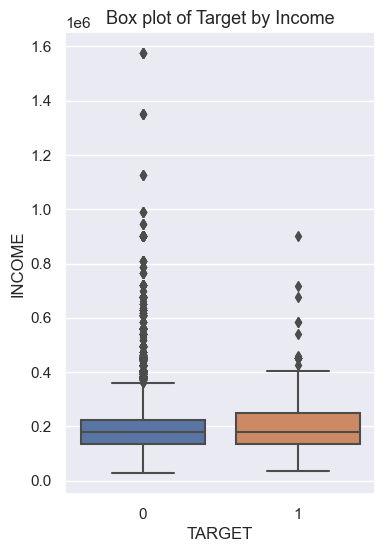

In [22]:
# Visualizing the results of the test through a Boxplot:
sns.set(rc={"figure.figsize":(4, 6)})
sns.boxplot(data=Credit, x="TARGET", y="INCOME")
plt.title('Box plot of Target by Income',
          fontsize=13)

In [23]:
# Number of units of activity on site "Yes" or "No" to check amounts on bar chart on previous step.
Credit["TARGET"].value_counts()
# Where 0 is legitimate transactions
# Where 1 is fraud transactions

0    21788
1      408
Name: TARGET, dtype: int64

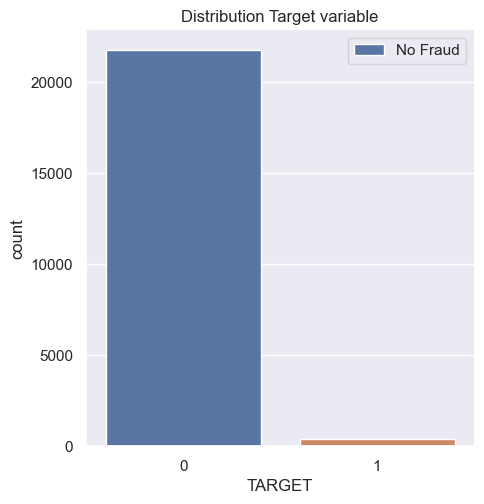

In [24]:
# Bar chart with the units with Activity on site. There are 219 with no activity and 174 with activity on site.
sns.catplot(x="TARGET", data=Credit, kind="count");
plt.title("Distribution Target variable")
plt.legend(["No Fraud", "Fraud"])

In [25]:
#Checking summary statistics on dataset
Credit.describe()

,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,22196.000000,2.219600e+04,22196.000000,22196.000000,22196.000000,22196.000000,22196.000000,22196.000000,22196.000000,22196.000000
mean,0.514147,1.938834e+05,0.274148,0.292215,0.100964,2.295774,25.988151,40.515048,7.189043,0.018382
std,0.792126,1.032757e+05,0.446094,0.454791,0.301288,0.951238,16.393403,9.598411,6.423988,0.134330
min,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,0.000000,1.350000e+05,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,0.000000,1.800000e+05,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,1.000000,2.250000e+05,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


In [26]:
# Checking the correlation between variables
correlation = Credit.corr()
print(correlation)

                NO_OF_CHILD    INCOME  WORK_PHONE     PHONE    E_MAIL  \
NO_OF_CHILD        1.000000 -0.015480   -0.012187 -0.018729 -0.019106   
INCOME            -0.015480  1.000000   -0.092074  0.011872  0.078619   
WORK_PHONE        -0.012187 -0.092074    1.000000  0.366623 -0.068844   
PHONE             -0.018729  0.011872    0.366623  1.000000  0.007611   
E_MAIL            -0.019106  0.078619   -0.068844  0.007611  1.000000   
FAMILY SIZE        0.902875 -0.023896    0.004695 -0.007227 -0.013493   
BEGIN_MONTH       -0.004073  0.021485    0.010610  0.019150 -0.008944   
AGE               -0.253394  0.062280   -0.040386  0.024373 -0.064115   
YEARS_EMPLOYED    -0.063576  0.016444    0.009051  0.043255 -0.043709   
TARGET            -0.001597  0.009076    0.006878  0.003523  0.000898   

                FAMILY SIZE  BEGIN_MONTH       AGE  YEARS_EMPLOYED    TARGET  
NO_OF_CHILD        0.902875    -0.004073 -0.253394       -0.063576 -0.001597  
INCOME            -0.023896     0.0214

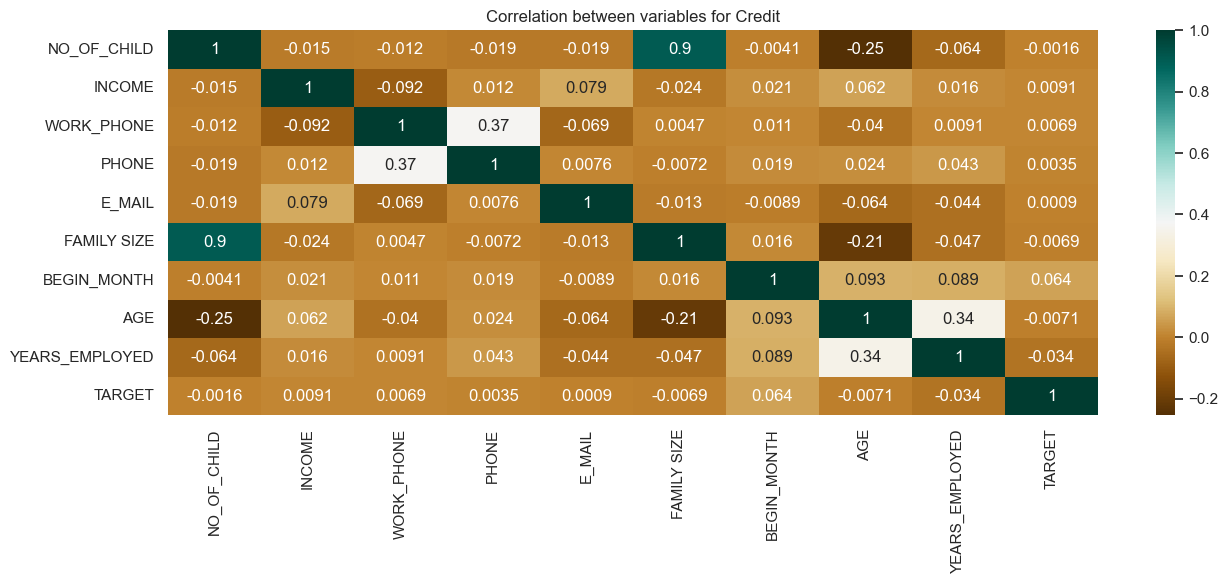

In [27]:
# Finding the relations between the variables through a heat map
plt.figure(figsize=(15,5)) 
c= Credit.corr() 
sns.heatmap(c,cmap="BrBG",annot=True) 
plt.title("Correlation between variables for Credit");
# There is a strong correlation of 0.9 between No_Of_Child and Family_Size. There is a weak correlation of 0.016 between 
# Income and Year employed. As well as that, there is a negative correlation of -0.019 between No. of Child and Phone variable. 
# 

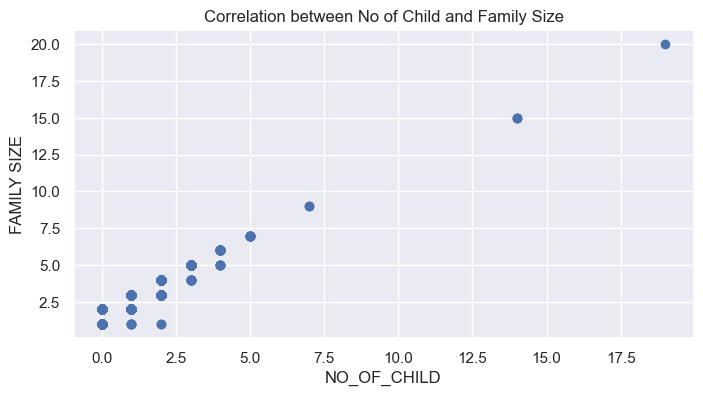

In [28]:
#Ploting a scatter plot to stablish if there is any correlation between two variables

fig, ax = plt.subplots(figsize=(8,4)) 
#sns.set_style('whitegrid')
ax.scatter(Credit['NO_OF_CHILD'], Credit['FAMILY SIZE']) 
ax.set_xlabel('NO_OF_CHILD') 
ax.set_ylabel('FAMILY SIZE') 
plt.title("Correlation between No of Child and Family Size");
plt.show() 

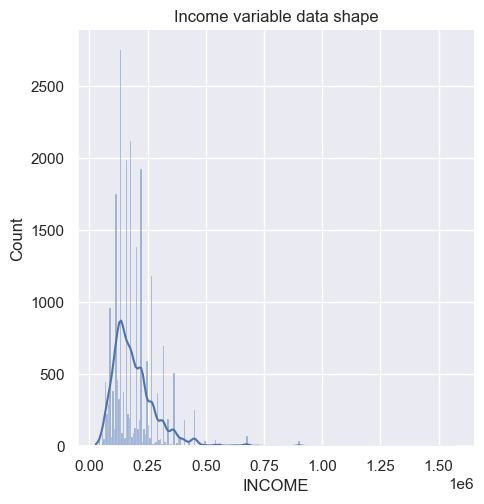

In [29]:
# Visualizing the Income variable
# It can be seen that data is positive skewed in this feature.
sns.set(rc={"figure.figsize":(3, 1)})
sns.displot(data=Credit, x="INCOME", kde=True);
plt.title("Income variable data shape");

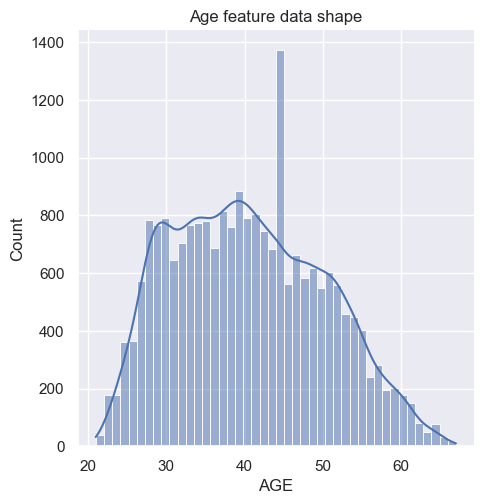

In [30]:
# Visualizing the Age variable
# It can be seen that data is positive skewed in this feature.
sns.set(rc={"figure.figsize":(4, 1)})
sns.displot(data=Credit, x="AGE", kde=True);
plt.title("Age feature data shape");

## Outliers detection

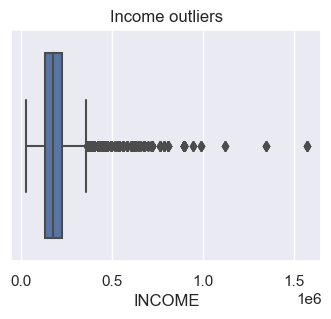

In [31]:
# Detecting Outliers
# As it can be seen below, there are ouliers in three of the numeric variables of my dataset.
sns.set(rc={"figure.figsize":(4, 3)})
sns.boxplot(x=Credit['INCOME']); 
plt.title("Income outliers");

In [32]:
#Checking outliers in others variables
col_dict = {'NO_OF_CHILD':1 , 'INCOME':2 ,
        'FAMILY SIZE':3 , 'AGE': 4, 'YEARS_EMPLOYED':5}

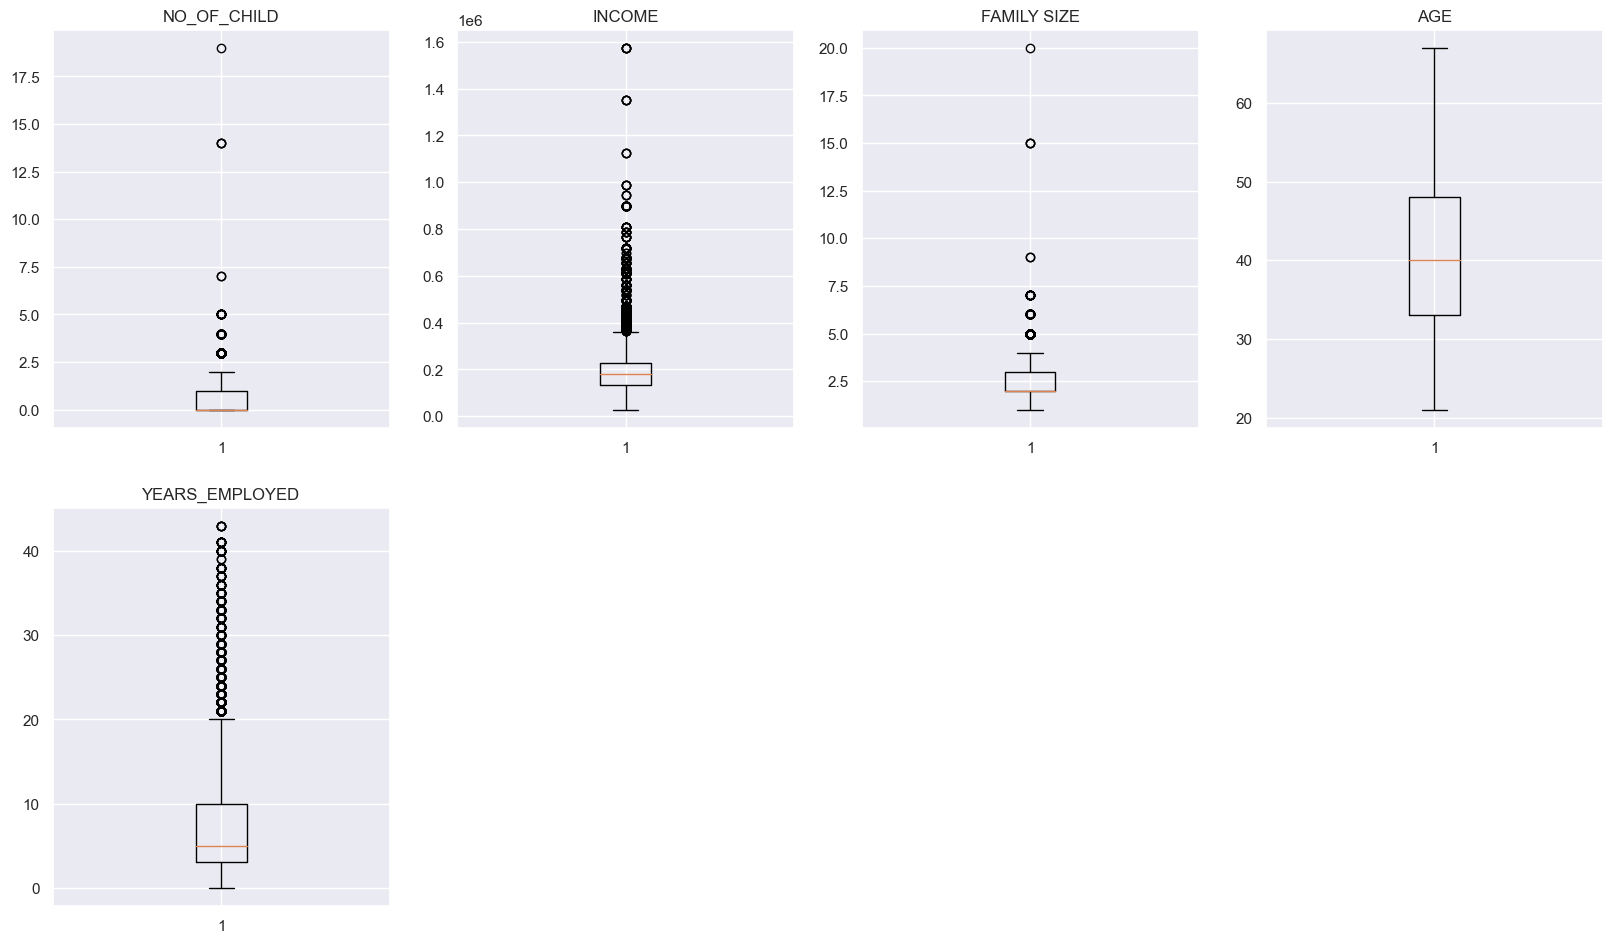

In [33]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(Credit[variable],whis=1.5)
                     plt.title(variable)

plt.show()

## Machine Learning section 

Deep learning models have been used since there are able to read complex patherns in the data and therefore make more accurate predictions that standard machine learning models. Taking this in consideration, a Random Forest Classifier will be compared with a ANN to verify their performance on the same given data.

## **Data Preparation**

In [34]:
# split into X and y
X = Credit.loc[:, ['GENDER', 'NO_OF_CHILD',
       'INCOME', 'WORK_PHONE', 'PHONE', 'E_MAIL','FAMILY SIZE', 'BEGIN_MONTH', 'AGE','YEARS_EMPLOYED']] # independent variables

y = Credit['TARGET']# dependent variables

In [35]:
X

,GENDER,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,M,0,112500.0,0,0,0,2,29,59,3
1,F,0,270000.0,0,1,1,1,4,52,8
2,F,0,270000.0,0,1,1,1,26,52,8
4,F,0,270000.0,0,1,1,1,38,52,8
5,M,0,270000.0,1,1,1,2,5,46,2
...,...,...,...,...,...,...,...,...,...,...
25129,M,0,315000.0,0,0,0,2,11,48,7
25130,F,0,157500.0,0,1,1,2,23,34,4
25131,F,0,157500.0,0,1,1,2,32,34,4
25132,F,0,283500.0,0,0,0,2,9,49,2


In [36]:
y

0        0
1        0
2        0
4        0
5        0
        ..
25129    1
25130    1
25131    1
25132    1
25133    1
Name: TARGET, Length: 22196, dtype: int64

In [37]:
# creating dummy variables for categorical variables

# subset all categorical variables
Credit_categorical = X.select_dtypes(include=['object'])
Credit_categorical.head()

,GENDER
0,M
1,F
2,F
4,F
5,M


In [38]:
#checking categorical values on that dataset
Credit_categorical.describe(include=object)

,GENDER
count,22196
unique,2
top,F
freq,13771


In [39]:
# convert into dummies
Credit_dummies = pd.get_dummies(Credit_categorical, drop_first=True)
Credit_dummies.head()

,GENDER_M
0,1
1,0
2,0
4,0
5,1


In [40]:
# drop categorical variables 
X = X.drop(list(Credit_categorical.columns), axis=1)

In [41]:
# concat dummy variables with X
# concat the dummy variable with the main wiht construction dataframe
X = pd.concat([X, Credit_dummies], axis=1)

In [42]:
X

,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,GENDER_M
0,0,112500.0,0,0,0,2,29,59,3,1
1,0,270000.0,0,1,1,1,4,52,8,0
2,0,270000.0,0,1,1,1,26,52,8,0
4,0,270000.0,0,1,1,1,38,52,8,0
5,0,270000.0,1,1,1,2,5,46,2,1
...,...,...,...,...,...,...,...,...,...,...
25129,0,315000.0,0,0,0,2,11,48,7,1
25130,0,157500.0,0,1,1,2,23,34,4,0
25131,0,157500.0,0,1,1,2,32,34,4,0
25132,0,283500.0,0,0,0,2,9,49,2,0


In [43]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['NO_OF_CHILD', 'INCOME', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'GENDER_M'],
      dtype='object')

In [44]:
#checking the efect of scale in the data
from sklearn.preprocessing import scale
Credit['scale_INCOME'] = scale(Credit['INCOME'])

Text(60.0, 0.5, 'Amounts of INCOME')

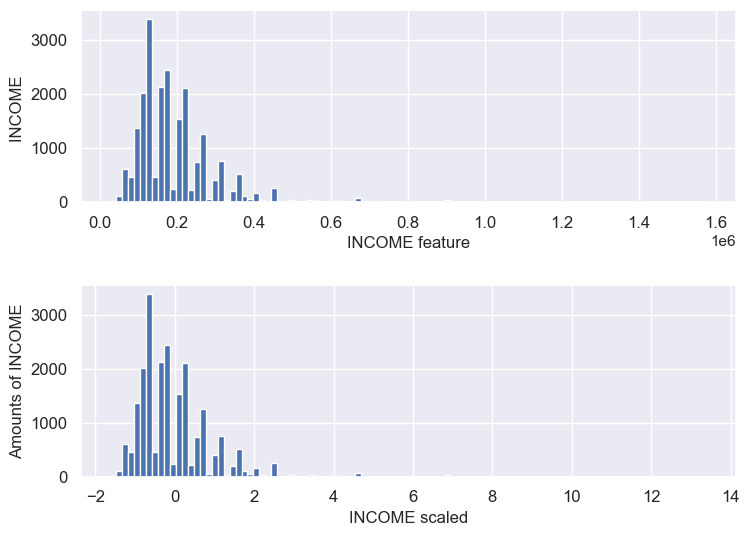

In [45]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8, 6))
fig.tight_layout(pad=3.0)

Credit['INCOME'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('INCOME feature', fontsize=12)
ax1.set_ylabel('INCOME ', fontsize=12)

Credit['scale_INCOME'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=12)
ax2.set_xlabel('INCOME scaled', fontsize=12)
ax2.set_ylabel('Amounts of INCOME', fontsize=12) 

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 90)

In [47]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) ##0.9795

Accuracy: 0.9798161830960533


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5441
           1       0.38      0.06      0.10       108

    accuracy                           0.98      5549
   macro avg       0.68      0.53      0.54      5549
weighted avg       0.97      0.98      0.97      5549



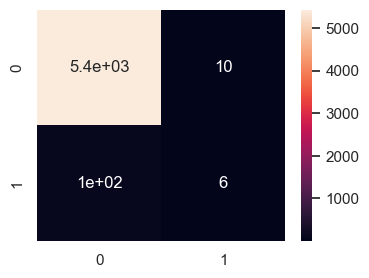

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

## Builiding an Artificial Neural Network model (ANN)

In [61]:
from keras.layers import Dense
from keras.models import Sequential

# Build neural network in Keras
model = Sequential()

# Add fully connected layer with a ReLU activation function
model.add(Dense(70, input_dim=10, activation='relu', )) # 10 columns that are being taken

# Add fully connected layer with a ReLU activation function
model.add(Dense(60, activation='relu'))

# Add fully connected layer with a sigmoid activation function - Output layer
model.add(Dense(1, activation='sigmoid')) # output layer

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 70)                770       
                                                                 
 dense_8 (Dense)             (None, 60)                4260      
                                                                 
 dense_9 (Dense)             (None, 1)                 61        
                                                                 
Total params: 5091 (19.89 KB)
Trainable params: 5091 (19.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Compile neural network
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, verbose=False)

In [64]:
# Results - Accuracy
scores = model.evaluate(X_train, y_train) # verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))

scores = model.evaluate(X_test, y_test) # verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

521/521 [==============================] - 1s 834us/step - loss: 0.0349 - accuracy: 0.9878
Training Accuracy: 98.78%

174/174 [==============================] - 0s 842us/step - loss: 0.1581 - accuracy: 0.9735
Testing Accuracy: 97.35%



In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
c_matrix

174/174 [==============================] - 0s 808us/step


array([[5393,   48],
       [  98,   10]], dtype=int64)

I had 5,549 observations in my test set. Out of 5393 were predicted to be legitimate transactions, and 98 were classified as being legitimate, when  there were not (type one error). It correctly predicted 10 transactions as being product of fraud and 48 as being not legitimate ones, when they really are (type two error).

In [66]:
# Get training and test loss histories
history = model.fit(X_train, y_train, epochs=150, verbose=0, validation_data=(X_test, y_test))

In [67]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [68]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

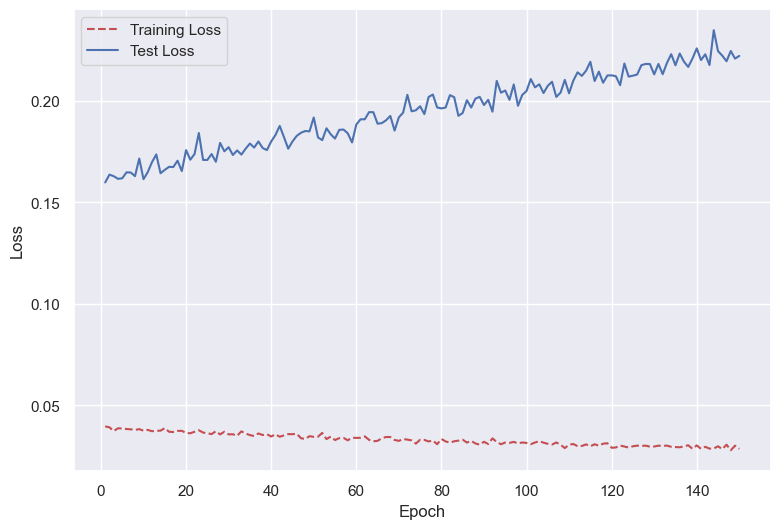

In [70]:
# Visualize loss history
plt.figure(figsize=(9,6))
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

**Alternatively, we can use the same approach to visualize the training and test accuracy over each epoch**

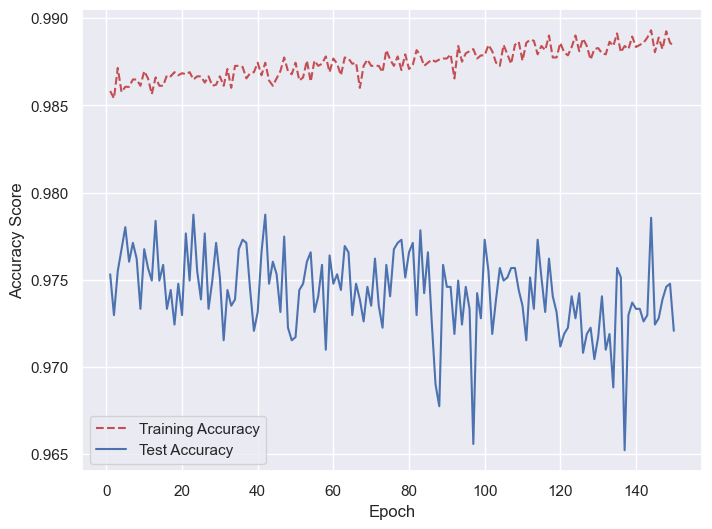

In [71]:
# Get training and test accuracy histories
plt.figure(figsize=(8,6))
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

**Discussion:** After performing one standard machine learning model, Random Forest, it yields an accuracy of 97%. Nevertheless, after performming ANN with one hidden layer and one output layer, it was able to classify the amount of ilegitim transaccionts.  

https://www.kaggle.com/datasets/dark06thunder/credit-card-dataset/code